## Лабораторная работа 1. Устройство изображения
### Водяный Михаил, РИМ-181228

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.transform import resize
from numpy import roll, dstack, clip
from matplotlib import pyplot as plt

In [2]:
img = imread('kappapride.png') 

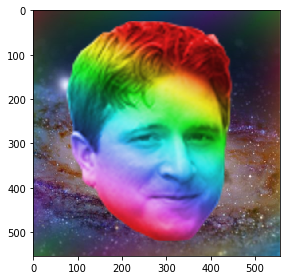

In [3]:
imshow(img)

### Количество столбцов

In [4]:
img.shape[1]

557

### Изменение цвета пикселя изображения

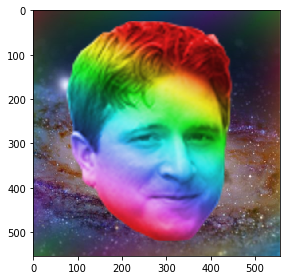

In [5]:
height = img.shape[0]
width = img.shape[1]
height, width
img_pixel = img
img_pixel[height//2,width//2]=[255,0,0,255] #middle pixel
imshow(img_pixel)

### Изменение цвета прямоугольника

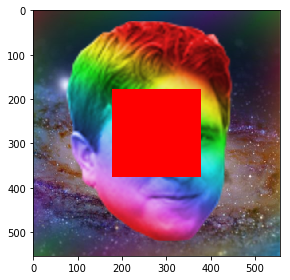

In [6]:
img_rect = img
img_rect[height//2-100:height//2+100,width//2-100:width//2+100]=[255,0,0,255]

imshow(img_rect)

In [7]:
# img_rect перезаписывал img почему-то ¯\_(ツ)_/¯
img = imread('kappapride.png')

### Определение рамки изображения

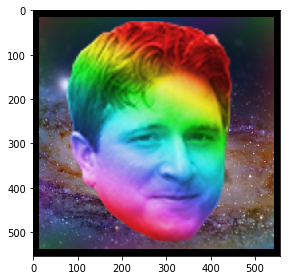

In [8]:
img_bordered = imread('kappapride_bordered.png')
imshow(img_bordered)

In [9]:
def detect_border(img_border):
    h=img_border.shape[0]
    w=img_border.shape[1]

    xs=w//2
    ys=h//2

    color=img_border[0,0]

    left, up, right, down = 0, 0, 0, 0 
    
    for i in range(w): 
        if all(img_border[xs,i]==color):
            left+=1
        else:
            break

    for i in range(h):
        if all(img_border[i,ys]==color):
            up+=1
        else:
            break

    for i in range(w):
        if all(img_border[xs,w-i-1]==color):
            right+=1
        else:
            break 

    for i in range(h):
        if all(img_border[h-i-1,ys]==color):
            down+=1
        else:
            break
        
    print("Border:", left,up,right,down)

In [10]:
detect_border(img_bordered)

Border: 13 16 14 15


### Вычисление негатива изображения

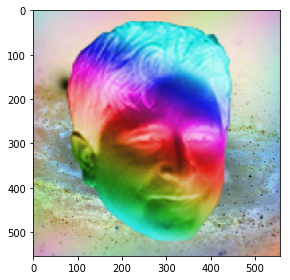

In [11]:
r=img[:,:,0]
g=img[:,:,1]
b=img[:,:,2]

rn=255-r
gn=255-g
bn=255-b

img_neg = dstack((rn,gn, bn))
imshow(img_neg)

### Поменять местами каналы изображения

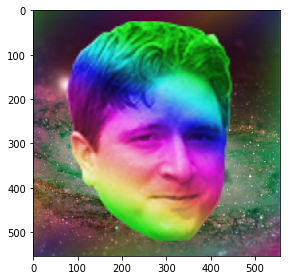

In [12]:
img_brg = dstack((b,r,g))
imshow(img_brg)

### Подсчет яркости изображения

D:\Programs\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


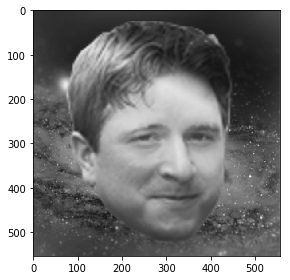

In [13]:
img_counted = img_as_float(img)

r = img_counted[:,:,0]
g = img_counted[:,:,1]
b = img_counted[:,:,2]

img_bright = clip(0.2126*r+0.7152*g+0.0722*b,0,1) #подсчет яркости
img_bright_result = img_as_ubyte(img_bright)

imshow(img_bright_result)

### Сопоставление фотографий Прокудина-Горского

In [14]:
def align(img, g_coord=(0,0)):
    row_g, col_g = g_coord

    img_f = img_as_float(img)
        
    height, width = img.shape
    height = img_f.shape[0]//3
    
    B = img_f[0 : height, 0 : width]
    G = img_f[height : height * 2, 0 : width]
    R = img_f[height * 2 : height * 3, 0 : width]
    
    img_f = dstack((R, G, B))
    
    pix = 30 
    row, col, _ = img_f.shape
    img_f = img_f[pix : row - pix, pix : col - pix]
    
    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]
    
    rows, columns = shift(B, G)
    row_b = row_g - rows - height
    col_b = col_g - columns 
    
    B_shifted = roll(B, rows, axis = 0)
    B_shifted = roll(B_shifted, columns, axis = 1)
    
    rows, columns = shift(R, G)
    
    row_r = row_g - rows + height
    col_r = col_g - columns

    R_shifted = roll(R, rows, axis = 0)
    R_shifted = roll(R_shifted, columns, axis = 1)
    
    imshow(dstack((R_shifted, G, B_shifted)))

    return (row_b, col_b), (row_r, col_r)

def shift(img_s, img_b):
 
    shift = {}

    for row in range(-15, 16): #30
        img_shift = roll(img_s, row, axis = 0) # rows

        for col in range(-15, 16):
            img_shift2 = roll(img_shift, col, axis = 1) # columns
            shift[row, col] = (img_shift2 * img_b).sum() # correlation
    r, c = max(shift, key=shift.get)
    return r, c

In [15]:
def show_pg_result(i = 0):
    if i > 9 or i < 0:
        i = 0
    align(imread('https://stepik.org/media/attachments/lesson/58182/0' + str(i) + '.png'))

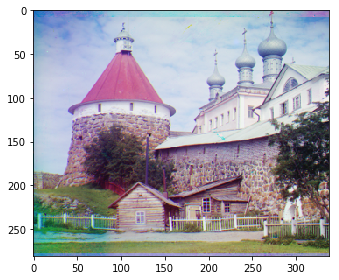

In [16]:
show_pg_result(1)

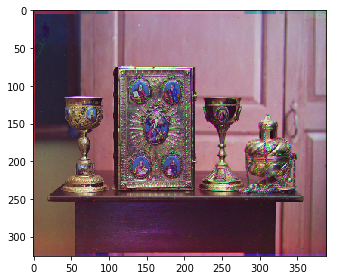

In [17]:
show_pg_result(5)

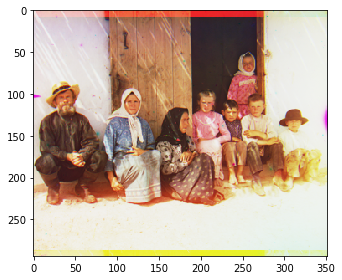

In [18]:
show_pg_result(7)

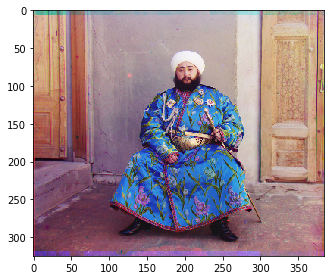

In [19]:
show_pg_result(9)